# Pima Indian Diabetes Prediction 
This notebook guides you step-by-step through the EDA and Machine Learning pipeline to predict diabetes using classification models.

**Goal**: Predict whether a person has diabetes based on medical attributes.

---

## Step 1: Import Libraries and Load Data
- Load the dataset with correct column names
- Show the first few rows to verify structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load CSV with headers
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', header=None, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isnull().sum()/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [4]:
#handling
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)
# Fill missing values with column mean
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].mean())

In [5]:
print(df[invalid_zero_cols].isnull().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)
- Check for zero values in columns
- Understand distributions with plots
- Visualize correlations

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


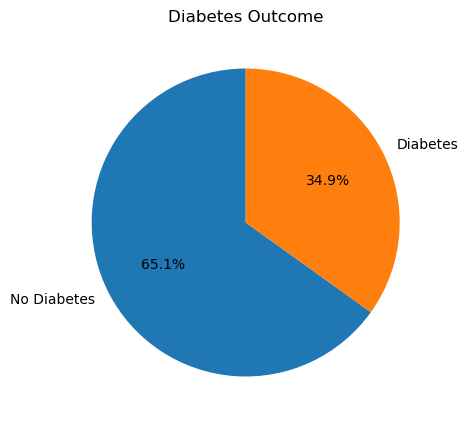

In [7]:
#Diabetes Count
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


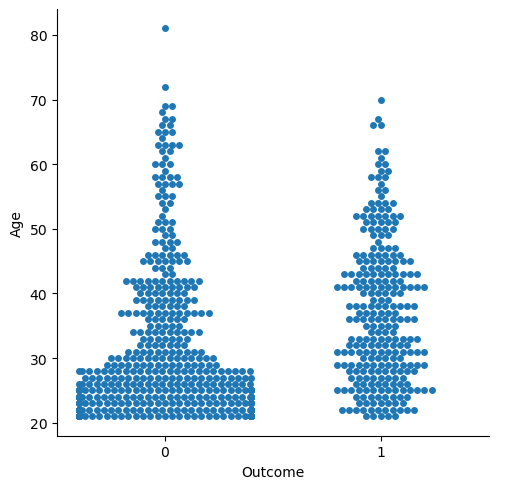

In [8]:
#Age Distribution and Diabetes
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\1075501048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\1075501048.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: Pregnancies vs Outcome')

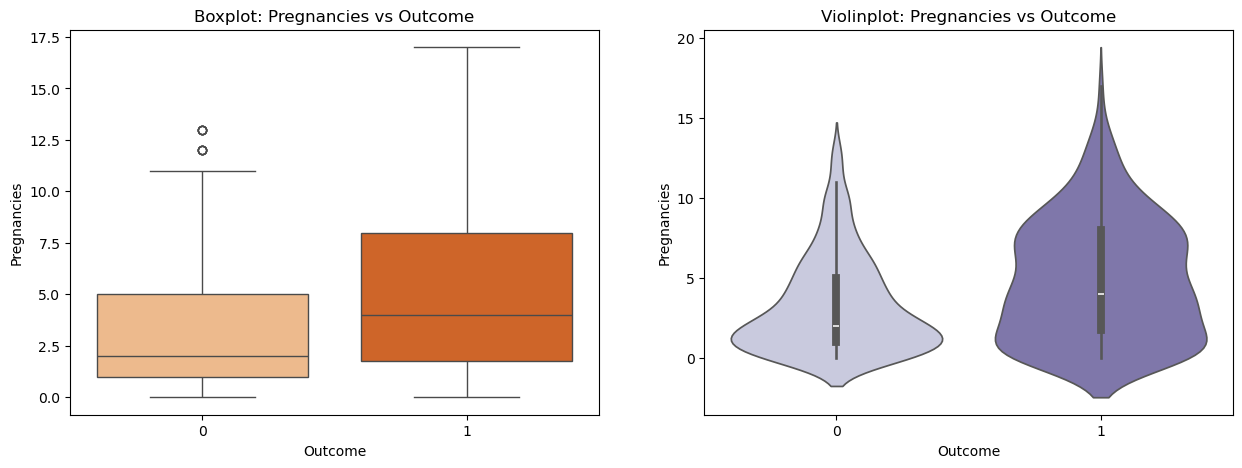

In [9]:
#Pregnancies and Diabetes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot in orange
sns.boxplot(
    x='Outcome', y='Pregnancies', data=df, ax=ax[0],
    palette='Oranges'
).set_title('Boxplot: Pregnancies vs Outcome')

# Violinplot in purple
sns.violinplot(
    x='Outcome', y='Pregnancies', data=df, ax=ax[1],
    palette='Purples'
).set_title('Violinplot: Pregnancies vs Outcome')

Text(0.5, 1.0, 'Glucose vs Diabetes')

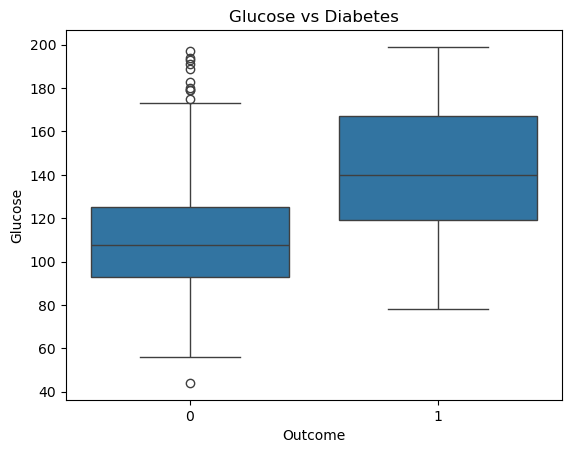

In [10]:
#Glucose and Diabetes
sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\4178007183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\4178007183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: BloodPressure vs Diabetes')

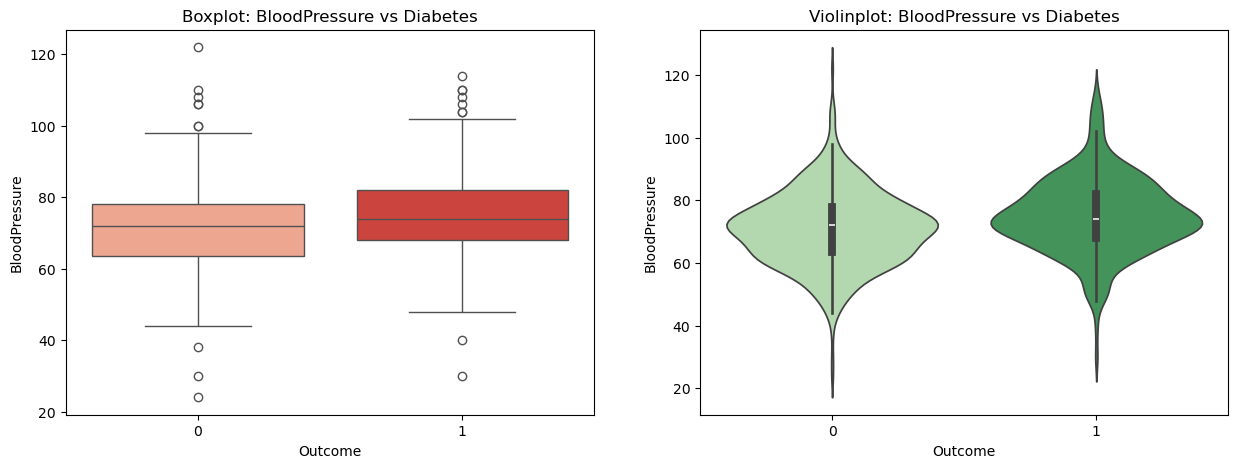

In [11]:
#Blood Pressure and Diabetes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    x='Outcome', y='BloodPressure',
    data=df, ax=ax[0], palette='Reds'
).set_title('Boxplot: BloodPressure vs Diabetes')

sns.violinplot(
    x='Outcome', y='BloodPressure',
    data=df, ax=ax[1], palette='Greens'
).set_title('Violinplot: BloodPressure vs Diabetes')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\3077929329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\3077929329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: SkinThickness vs Diabetes')

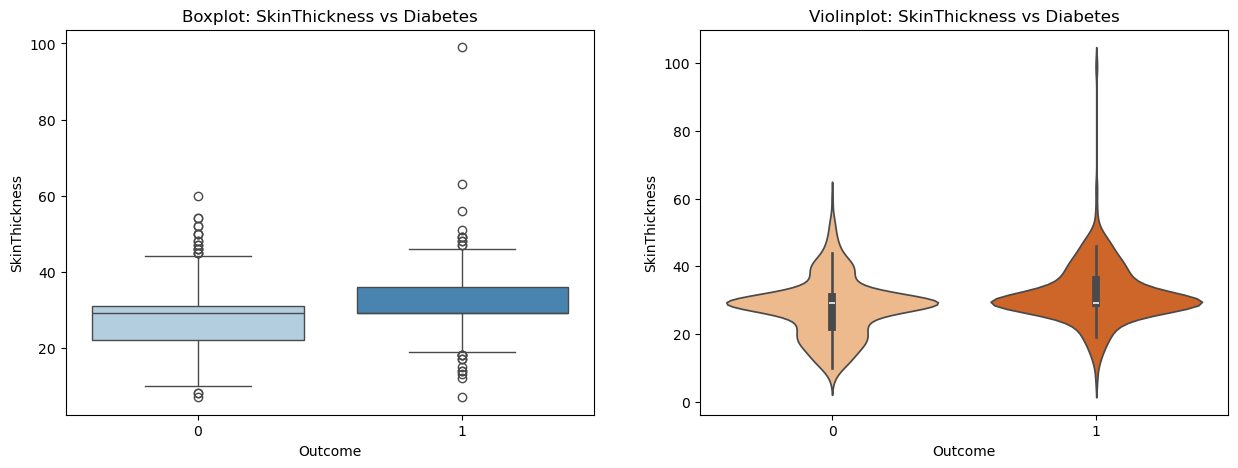

In [12]:
#Skin Thickness and Diabetes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    x='Outcome', y='SkinThickness',
    data=df, ax=ax[0], palette='Blues'
).set_title('Boxplot: SkinThickness vs Diabetes')

sns.violinplot(
    x='Outcome', y='SkinThickness',
    data=df, ax=ax[1], palette='Oranges'
).set_title('Violinplot: SkinThickness vs Diabetes')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\2817574032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\2817574032.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: Insulin vs Diabetes')

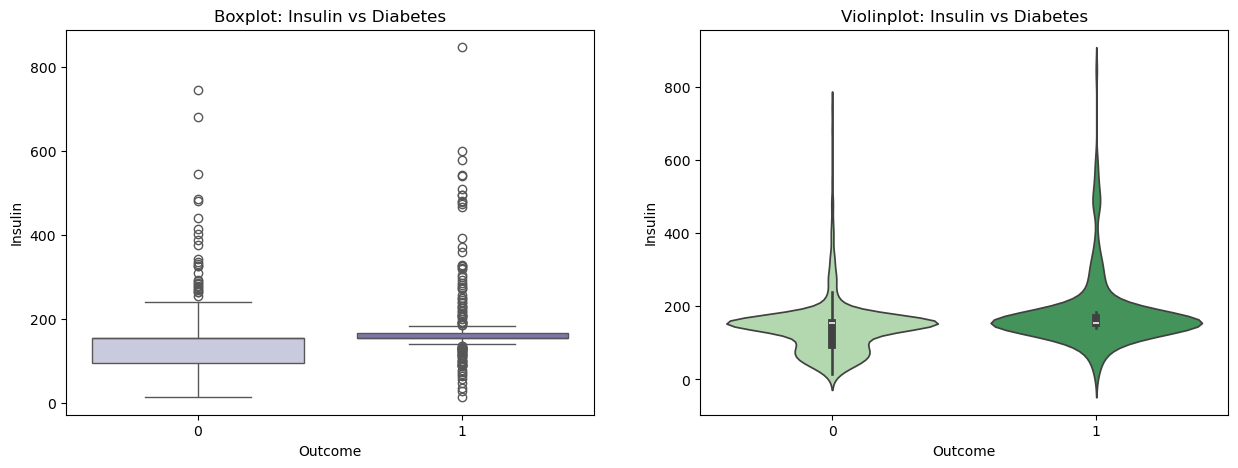

In [13]:
#Insulin and Diabetes

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    x='Outcome', y='Insulin',
    data=df, ax=ax[0], palette='Purples'
).set_title('Boxplot: Insulin vs Diabetes')

sns.violinplot(
    x='Outcome', y='Insulin',
    data=df, ax=ax[1], palette='Greens'
).set_title('Violinplot: Insulin vs Diabetes')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\1365968038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\1365968038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: BMI vs Diabetes')

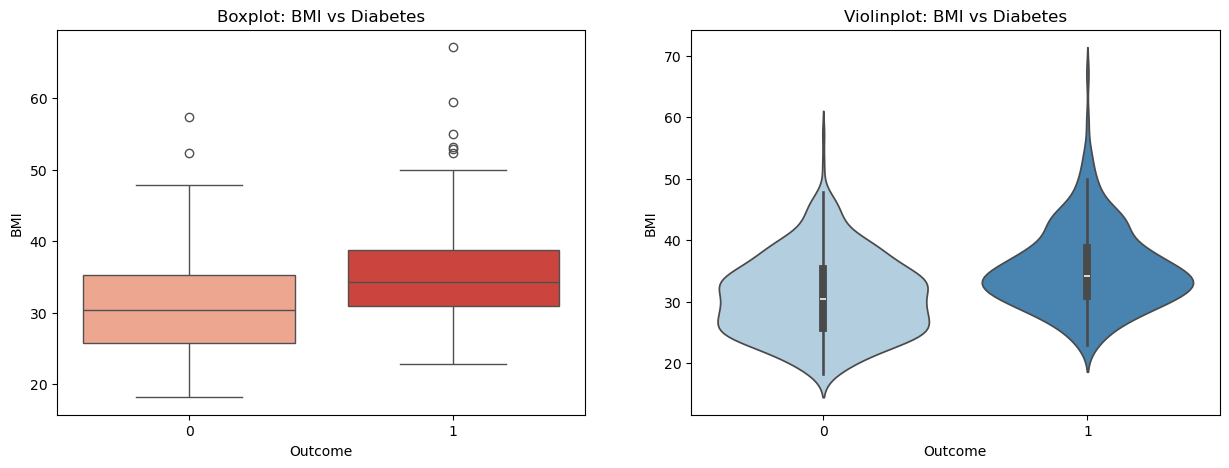

In [14]:
#BMI and Diabetes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    x='Outcome', y='BMI',
    data=df, ax=ax[0], palette='Reds'
).set_title('Boxplot: BMI vs Diabetes')

sns.violinplot(
    x='Outcome', y='BMI',
    data=df, ax=ax[1], palette='Blues'
).set_title('Violinplot: BMI vs Diabetes')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\724523022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\724523022.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Violinplot: Diabetes Pedigree Function')

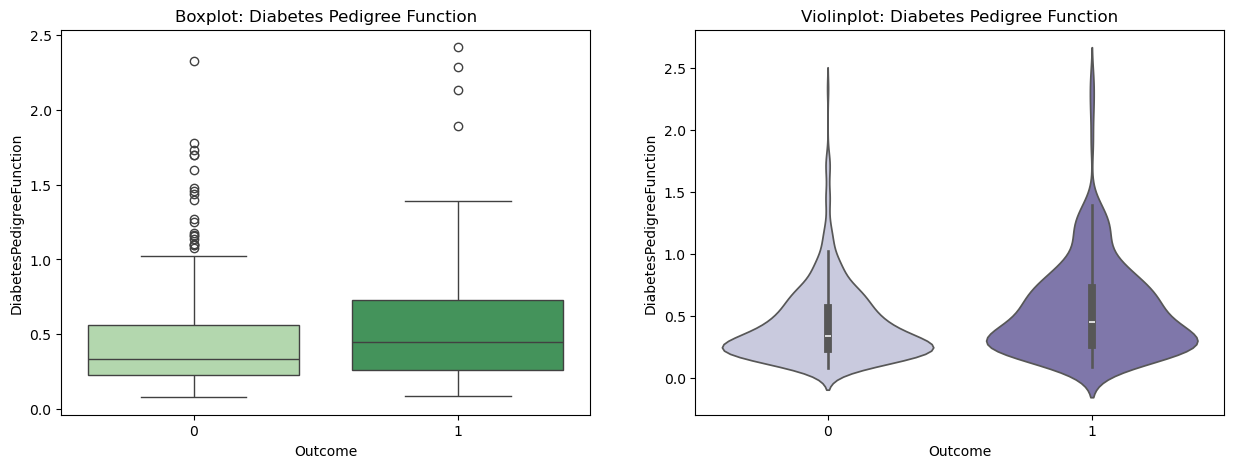

In [15]:
#Diabetes Pedigree Function and Diabetes Outcome
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot with green hues
sns.boxplot(
    x='Outcome', y='DiabetesPedigreeFunction',
    data=df, ax=ax[0], palette='Greens'
).set_title('Boxplot: Diabetes Pedigree Function')

# Violinplot with purple hues
sns.violinplot(
    x='Outcome', y='DiabetesPedigreeFunction',
    data=df, ax=ax[1], palette='Purples'
).set_title('Violinplot: Diabetes Pedigree Function')

<Axes: >

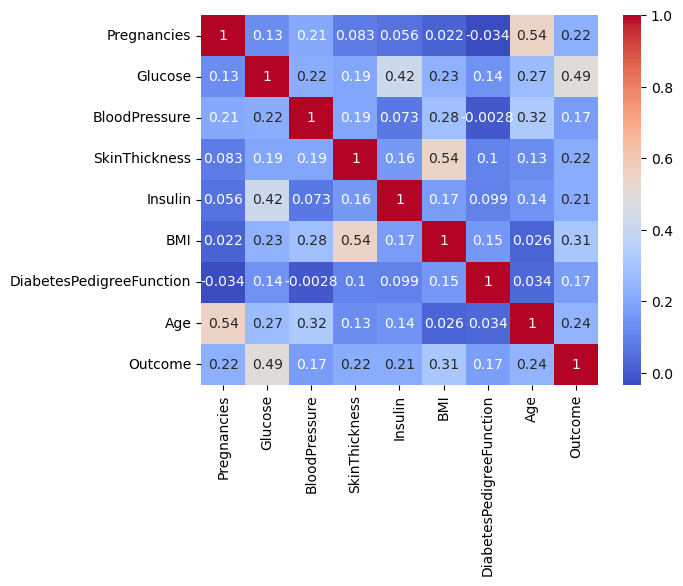

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Step 3: Handle Missing or Invalid Data
- Replace zero values in key columns with NaN
- Fill missing values using mean or median

In [17]:
# List of columns where 0 is considered invalid/missing
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check how many zeros each of those columns has
for col in invalid_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zeros in {col}: {zero_count}")

Number of zeros in Glucose: 0
Number of zeros in BloodPressure: 0
Number of zeros in SkinThickness: 0
Number of zeros in Insulin: 0
Number of zeros in BMI: 0


In [18]:
#handling
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)
# Fill missing values with column mean
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].mean())

In [19]:
print(df[invalid_zero_cols].isnull().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## Step 4: Detect Outliers
- Use box plots to visualize outliers
- Decide whether to keep, remove, or treat them

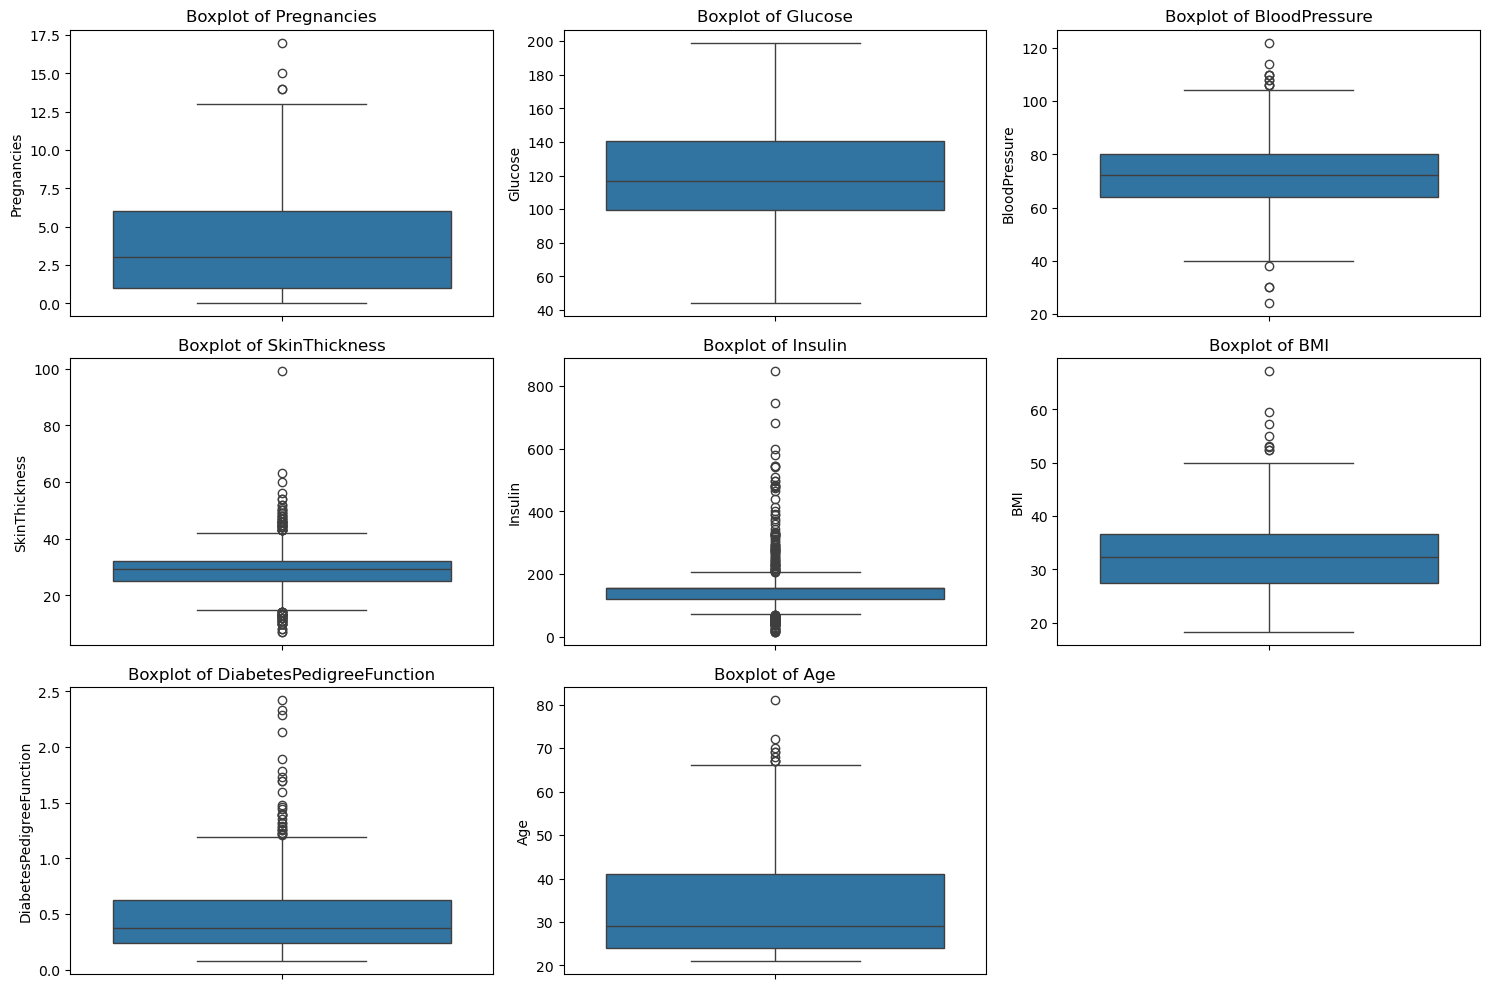

In [20]:
# Visualize each numerical feature using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [21]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Optionally cap values instead of dropping
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

# Apply to selected columns
numeric_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age','DiabetesPedigreeFunction','Pregnancies']
df = remove_outliers_iqr(df, numeric_columns)

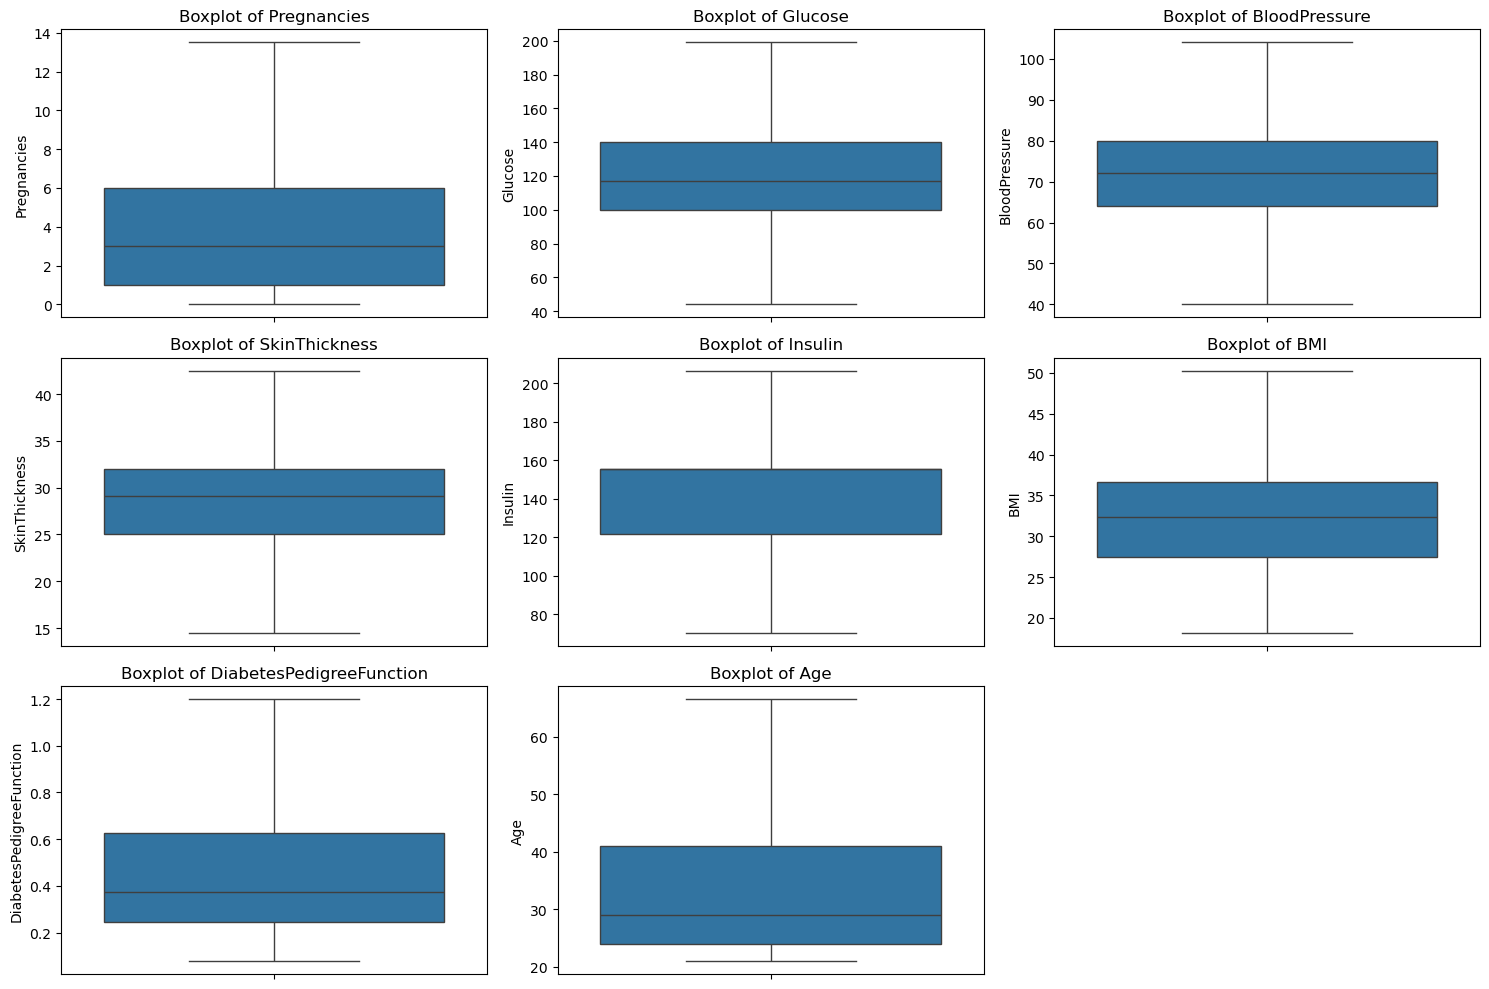

In [24]:
#After Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Step 5: Feature Scaling
- Use `StandardScaler` or `MinMaxScaler` to scale features

In [25]:
from sklearn.preprocessing import StandardScaler

df_fe = df.copy()

# Add interaction features BEFORE scaling
df_fe['Insulin_Glucose_Ratio'] = df_fe['Insulin'] / (df_fe['Glucose'] + 1e-5)
df_fe['BMI_Age_Ratio'] = df_fe['BMI'] / (df_fe['Age'] + 1e-5)
df_fe['Pregnancy_BMI_Interaction'] = df_fe['Pregnancies'] * df_fe['BMI']

# Separate features and target
X = df_fe.drop('Outcome', axis=1)
y = df_fe['Outcome']

# Scale everything (including engineered features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Put into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
# Features to scale (exclude target column 'Outcome')
features = df.drop('Outcome', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(features)

# Convert scaled array back to DataFrame (optional but nice for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)

In [27]:
X_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.938894e-17,-3.561966e-16,3.168762e-16,2.879641e-16,-3.955170e-16,7.285839e-16,-2.081668e-16,2.220446e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.148194e+00,-2.554131e+00,-2.769778e+00,-1.937433e+00,-1.862372e+00,-2.130474e+00,-1.334619e+00,-1.049828e+00
25%,-8.489700e-01,-7.212214e-01,-7.166038e-01,-5.258862e-01,-5.684540e-01,-7.347327e-01,-7.538762e-01,-7.916706e-01
50%,-2.505221e-01,-1.540881e-01,-1.488091e-02,3.247047e-02,2.941581e-01,6.581427e-04,-3.027713e-01,-3.614087e-01
75%,6.471497e-01,6.103090e-01,6.521789e-01,4.151448e-01,2.941581e-01,6.309931e-01,5.862995e-01,6.712197e-01
max,2.891329e+00,2.541850e+00,2.705353e+00,1.826691e+00,1.588076e+00,2.679582e+00,2.596563e+00,2.865555e+00


## Step 6: Train-Test Split
- Use `train_test_split` to divide data into training and testing sets

In [28]:

# Train-Test Split
X = X_scaled_df
y = df_fe['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_sm.value_counts().to_dict())

Before SMOTE: {0: 400, 1: 214}
After SMOTE: {0: 400, 1: 400}


## Step 7: Train Multiple Classification Models
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Decision Tree
- Support Vector Machine (SVM)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
lr_model = LogisticRegression()
lr_model.fit(X_train_sm, y_train_sm)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7207792207792207
[[74 26]
 [17 37]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6818181818181818
[[68 32]
 [17 37]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       100
           1       0.54      0.69      0.60        54

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.68      0.69       154



In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7142857142857143
[[80 20]
 [24 30]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_sm, y_train_sm)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7337662337662337
[[76 24]
 [17 37]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6818181818181818
[[66 34]
 [15 39]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       100
           1       0.53      0.72      0.61        54

    accuracy                           0.68       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.72      0.68      0.69       154



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.65      0.63        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154



In [35]:
#!pip install xgboost

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:08:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Step 8: Evaluate and Compare Models
- Use accuracy, confusion matrix, and classification report
- Compare all models side-by-side

C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\3311043222.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_df, x="Model", y="Accuracy", palette="crest")


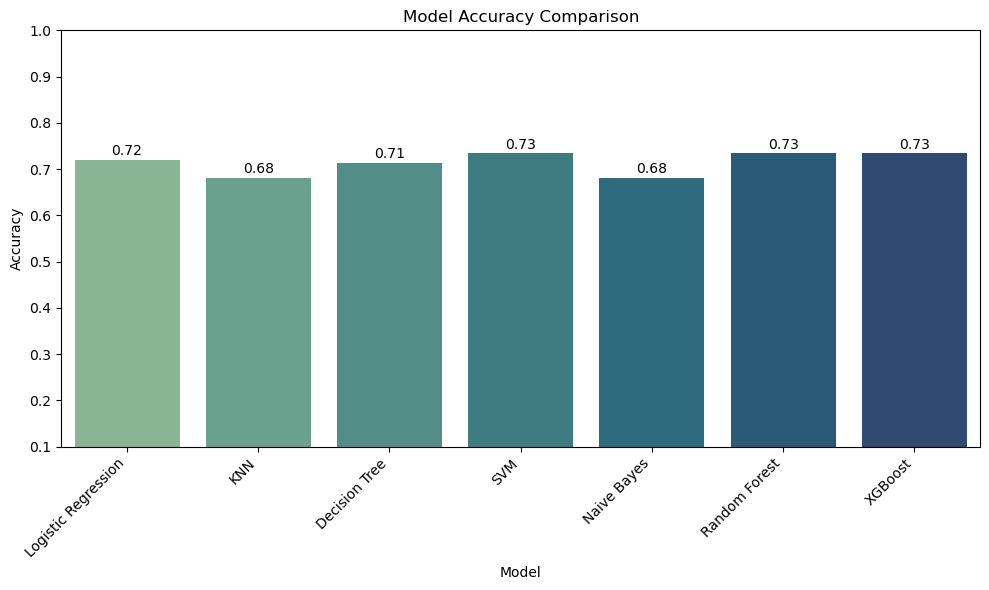

In [52]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Convert to DataFrame
acc_df = pd.DataFrame(list(models.items()), columns=["Model", "Accuracy"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=acc_df, x="Model", y="Accuracy", palette="crest")
plt.title("Model Accuracy Comparison")
plt.ylim(0.1, 1.0)
plt.xticks(rotation=45, ha='right')

# Add labels
for i, row in acc_df.iterrows():
    plt.text(i, row.Accuracy + 0.01, f"{row.Accuracy:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [38]:
sorted_models = dict(sorted(models.items(), key=lambda x: x[1], reverse=True))

for model, score in sorted_models.items():
    print(f"{model}: {score:.4f}")

SVM: 0.7338
Random Forest: 0.7338
XGBoost: 0.7338
Logistic Regression: 0.7208
Decision Tree: 0.7143
KNN: 0.6818
Naive Bayes: 0.6818


## Step 9: Optional - Handle Imbalanced Data
- Use SMOTE (Synthetic Minority Over-sampling Technique) if needed
- Install via `pip install imbalanced-learn`

#### ROC curves

In [40]:
from sklearn.model_selection import GridSearchCV

# Define param grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_sm, y_train_sm)

# Prediction and evaluation
y_pred_best_knn = grid_knn.predict(X_test)

📊 AUC Score Summary:
                 Model  AUC Score
0        Random Forest   0.809722
1  Logistic Regression   0.806111
2                  SVM   0.805556
3              XGBoost   0.800185
4          Naive Bayes   0.798148
5                  KNN   0.765185
6            Tuned KNN   0.753519
7        Decision Tree   0.677778


C:\Users\DELL\AppData\Local\Temp\ipykernel_13492\1862507097.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="AUC Score", y="Model", data=auc_df, palette="viridis")


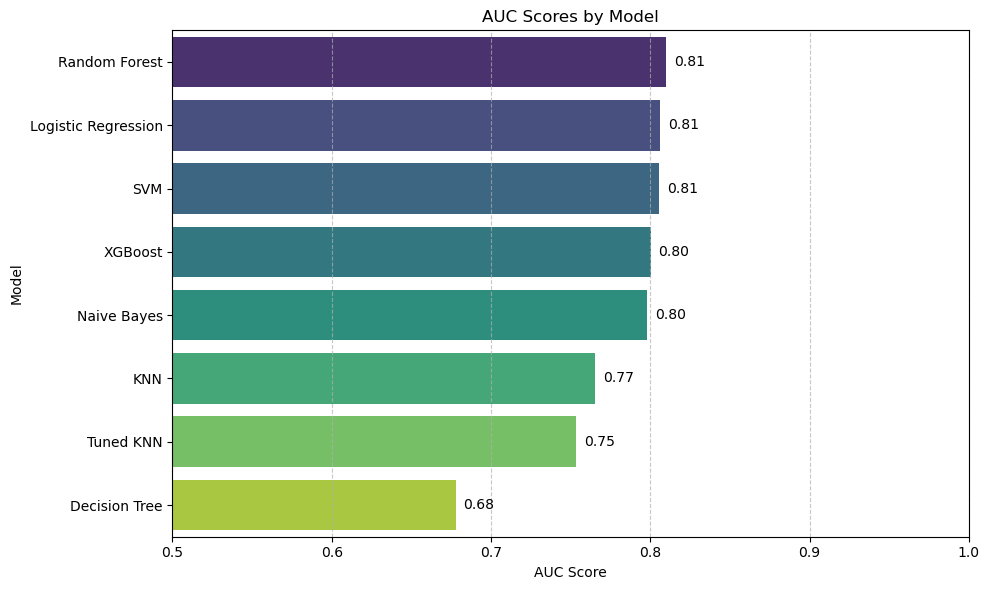

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Collect AUC scores
auc_scores = {}

# List of models and their names
all_models = [
    ("Logistic Regression", lr_model),
    ("KNN", knn),
    ("Tuned KNN", grid_knn),
    ("Decision Tree", dt),
    ("SVM", svm),
    ("Naive Bayes", nb),
    ("Random Forest", rf),
    ("XGBoost", xgb)
]

# Loop through all models
for name, model in all_models:
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    auc = roc_auc_score(y_test, y_score)
    auc_scores[name] = auc
    
#  1. Create a Summary DataFrame
auc_df = pd.DataFrame(list(auc_scores.items()), columns=["Model", "AUC Score"])
auc_df = auc_df.sort_values(by="AUC Score", ascending=False).reset_index(drop=True)

print("📊 AUC Score Summary:")
print(auc_df)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="AUC Score", y="Model", data=auc_df, palette="viridis")

# Add value labels to bars
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 0.005,                          
        bar.get_y() + bar.get_height() / 2,    
        f"{width:.2f}",                        
        va='center'
    )

# Axis and title
plt.title("AUC Scores by Model")
plt.xlabel("AUC Score")
plt.ylabel("Model")
plt.xlim(0.5, 1.0)  # Adjust as per your range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [47]:
import joblib

joblib.dump(xgb, 'diabetes_model.pkl') 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [49]:
import pickle

# Save the model (use your best model here)
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)  # or rf, lr_model, etc.

# Save the scaler used during training
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)